<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With Multiple Variable</h2>


Sample problem of predicting home price


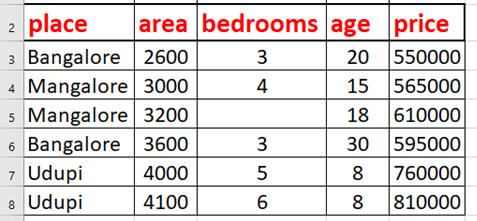


Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old in Bangalore**

**2500 sqr ft area, 4 bedrooms,  5 year old in mangalore**

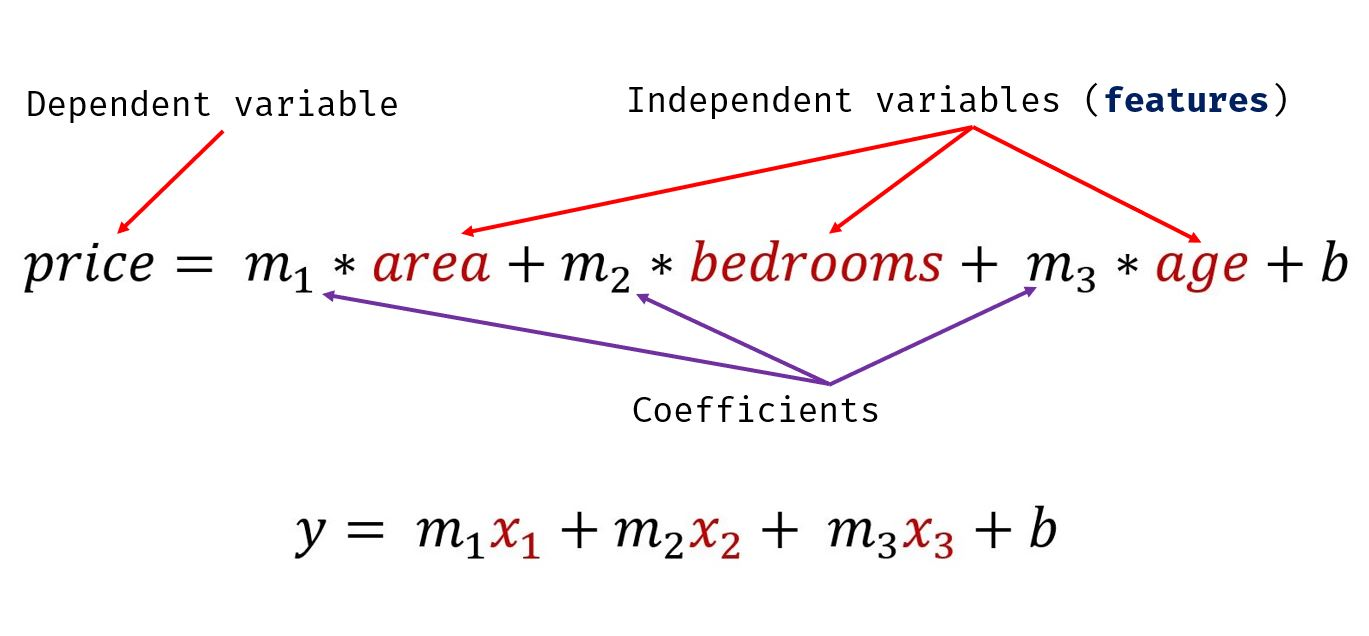

Here area, bedrooms, age are called independant variables or **features** whereas price is a dependant variable

#  Import support packages 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Steps  1: Collection Data

In [7]:
#LOAD DATA
df = pd.read_csv('homeprices2.csv')
df

,place,area,bedrooms,age,price
0,Bangalore,2600,3.0,20,550000
1,Mangalore,3000,4.0,15,565000
2,Mangalore,3200,NaN,18,610000
3,Bangalore,3600,3.0,30,595000
4,Udupi,4000,5.0,8,760000
5,Udupi,4100,6.0,8,810000


# Step 2: Data Wrangling: 



In [8]:
#chekking data
df.head()
df.shape
df.describe().T
df.info()
df.isna().sum()

4.0

In [ ]:
#deleteing unwanted coloumn

In [9]:
#insert median to dataset
df.bedrooms.median()
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,place,area,bedrooms,age,price
0,Bangalore,2600,3.0,20,550000
1,Mangalore,3000,4.0,15,565000
2,Mangalore,3200,4.0,18,610000
3,Bangalore,3600,3.0,30,595000
4,Udupi,4000,5.0,8,760000
5,Udupi,4100,6.0,8,810000


# Using pandas to create dummy variables

In [10]:
#find dummy variable
dummies = pd.get_dummies(df.place)
dummies

,Bangalore,Mangalore,Udupi
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,0,1
5,0,0,1


In [11]:
#insert dummy variable to dataset
df= pd.concat([df,dummies],axis='columns')
df

,place,area,bedrooms,age,price,Bangalore,Mangalore,Udupi
0,Bangalore,2600,3.0,20,550000,1,0,0
1,Mangalore,3000,4.0,15,565000,0,1,0
2,Mangalore,3200,4.0,18,610000,0,1,0
3,Bangalore,3600,3.0,30,595000,1,0,0
4,Udupi,4000,5.0,8,760000,0,0,1
5,Udupi,4100,6.0,8,810000,0,0,1


In [12]:
#filter the data set
del df['place']
df

,area,bedrooms,age,price,Bangalore,Mangalore,Udupi
0,2600,3.0,20,550000,1,0,0
1,3000,4.0,15,565000,0,1,0
2,3200,4.0,18,610000,0,1,0
3,3600,3.0,30,595000,1,0,0
4,4000,5.0,8,760000,0,0,1
5,4100,6.0,8,810000,0,0,1


# Steps 3: Analyise  Data Set

In [13]:
#taking y value
y=df.price

In [14]:
#taking x value
del df['price']
x=df


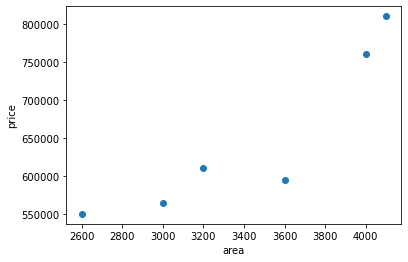

In [15]:
#Analyise Data Set
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(x.area,y)

# Step 4: Train Algorithm

In [16]:
# Create linear regression object or model
model = LinearRegression()


model.fit(x, y)
With .fit(), you calculate the optimal values of the weights 𝑏₀ and 𝑏₁, using the existing input and output (x and y) as the arguments. In other words, .fit() fits the model. It returns self, which is the variable model itself. That’s why you can replace the last two statements with this one:

In [17]:
# Create a model and fit it


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [18]:
# Create a model and fit it
# fit only train value
model.fit(X_train, y_train)

LinearRegression()

# Step 5: Test Algorithm

**3000 sqr ft area, 3 bedrooms, 40 year old in Bangalore**

In [20]:
x

,area,bedrooms,age,Bangalore,Mangalore,Udupi
0,2600,3.0,20,1,0,0
1,3000,4.0,15,0,1,0
2,3200,4.0,18,0,1,0
3,3600,3.0,30,1,0,0
4,4000,5.0,8,0,0,1
5,4100,6.0,8,0,0,1


In [22]:
#predict price for 3000 sqr ft area, 3 bedrooms, 40 year old in Bangalore
model.predict([[3,3,40,1,0,0,1,0]])

array([312839.58794694])

# Alternate Method



In [23]:
#predict using y=mx+b
#take x
x=[3000,3,40,1,0,0]

In [26]:
#find m
m=model.coef_
m

array([    62.43537273,  43756.46272679,  -3750.78745339,  12883.71933068,
       -15835.54194215,   2951.82261147])

In [27]:
#find b
b=model.intercept_
b

318530.67245332716

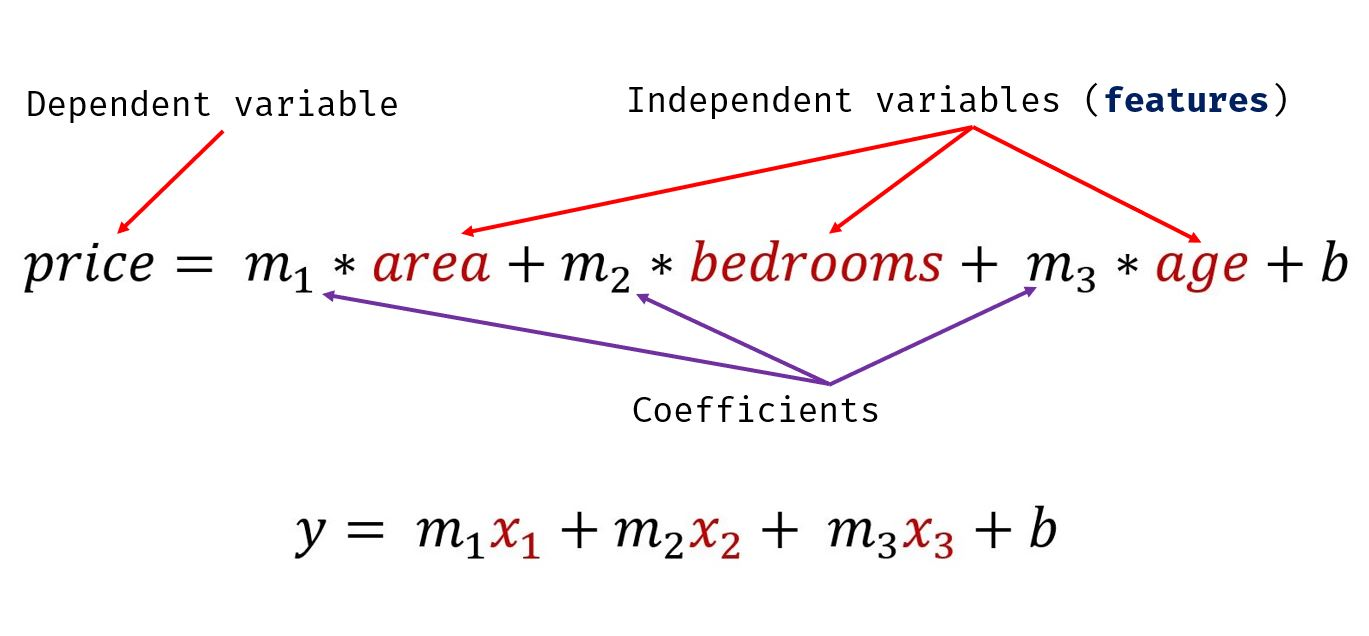

**Y = m * X + b (m is coefficient and b is intercept)**

In [28]:
#find y
Y = m[0] * x[0] + m[1] * x[1]+m[2] * x[2]+m[3] * x[3]+m[4] * x[4]+m[5] * x[5]+b
Y

499958.4000250191

In [ ]:
 reg.score(X, y)

# Step 5:Operation And Optimization

# A. Save Model To a File Using Python Pickle


In [21]:
import pickle

In [22]:
#Save Model To a File Using Python Pickle
with open('model_pickle','wb') as file:
    pickle.dump(model,file)

# B. Load Saved Model

In [23]:
#Load Saved Model
with open('model_pickle','rb') as file:
    mp = pickle.load(file)

# C. Test Saved Model


In [24]:
#Test Saved Model
mp.predict([[3000,3,40,1,0,0]])

array([449051.12255347])

<h3>Exercise</h3>

In classroom there is **hiring.csv**. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,


**2 yr experience, 9 test score, 6 interview score**

**12 yr experience, 10 test score, 10 interview score**

<h3>Answer</h3>

41288.69409442